# **nintendo**

# **ЗАДАНИЕ 1. ПЕРВИЧНЫЙ АНАЛИЗ ВРЕМЕННОГО РЯДА С ИСПОЛЬЗОВАНИЕМ ОПИСАТЕЛЬНЫХ СТАТИСТИК И ВИЗУАЛИЗАЦИИ**

Проведите первичный анализ данных по ценам на материал 1 с использованием описательных статистик и визуализации, выявите неоднородность данных с помощью коэффициентов дифференциации и коэффициента фондов.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


In [ ]:
!pip install --upgrade xlrd # установка модуля для EXELевских файлов

     |████████████████████████████████| 96 kB 2.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import os
from pandas import read_csv
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Grouper
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Методика выполнения задания:**
# **Раздел 1. Загрузка данных и первичный анализ с использованием описательных статистик**


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных')

In [ ]:
data=read_csv('ubisoft.csv')

In [ ]:
data

,Date,Open,High,Low,Close,Volume,Currency
0,2010-01-05,2.97,2.97,2.97,2.97,500,USD
1,2010-01-11,3.14,3.19,3.10,3.10,1815,USD
2,2010-01-12,3.00,3.00,3.00,3.00,500,USD
3,2010-01-13,2.90,2.90,2.83,2.83,13500,USD
4,2010-01-14,2.78,2.78,2.75,2.75,3285,USD
...,...,...,...,...,...,...,...
2507,2022-04-22,8.17,8.78,8.15,8.62,283772,USD
2508,2022-04-25,9.30,9.35,8.93,9.04,247016,USD
2509,2022-04-26,8.81,8.81,8.53,8.54,193738,USD
2510,2022-04-27,8.55,8.62,8.40,8.42,141300,USD


In [ ]:
data.head(5)

,Date,Open,High,Low,Close,Volume,Currency
0,2010-01-04,30.25,30.95,30.25,30.90,105408,USD
1,2010-01-05,31.15,32.50,31.05,31.47,210553,USD
2,2010-01-06,32.90,33.40,31.81,33.15,367749,USD
3,2010-01-07,33.90,34.35,33.90,34.22,416643,USD
4,2010-01-08,34.55,34.85,34.40,34.82,441858,USD


In [ ]:
data.shape

(3103, 7)

In [ ]:
data.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

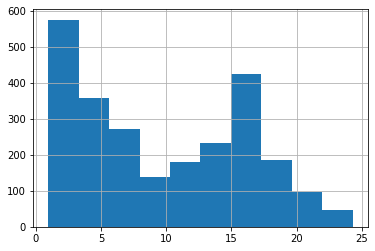

In [ ]:
data.Close.hist()

__________________________________________

# **ДАТАСЕТ**

In [ ]:
df=data[['Date','Close']]

In [ ]:
df = df[-1082:-74] # выбралданные с 2018 года по 2021 включительно

In [ ]:
df = df.drop(df.index[[300,550,551,800]])

In [ ]:
pd.set_option('precision', 2)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df=df.set_index('Date')

In [ ]:
series=df.squeeze() # переводим DataFrame в Series для дальнейшей работы
series.head(5)

Date
2018-01-11    17.19
2018-01-12    17.05
2018-01-16    17.00
2018-01-17    16.98
2018-01-18    16.67
Name: Close, dtype: float64

In [ ]:
series=series.resample('M').mean()

In [ ]:
df = series.reset_index()

In [ ]:
df = df.set_index('Date')

In [ ]:
df.shape

(49, 1)

_________________________________________

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b5a59a350>]],
      dtype=object)

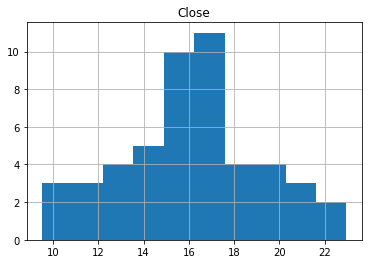

In [ ]:
df.hist()

In [ ]:
df.describe()

,Close
count,49.00
mean,118.98
std,19.32
min,80.24
25%,99.00
50%,124.18
75%,137.22
max,143.47


**14.	 Рассчитайте коэффициенты дифференциации:**

***Коэффициенты дифференциации*** – децильный (K_D), квартильный (K_Q) – показывают, во сколько раз нижняя граница 10% (25%) лучших превосходит верхнюю границу 10% (25%) худших значений измеряемого признака.

K_D=D_9/D_1

K_Q=Q_3/Q_1

Воспользуйтесь функцией quantile() для вычисления необходимых квантилей.


In [ ]:
d1=df.quantile(0.1) # нижний квантиль
d1

Close    38.77
Name: 0.1, dtype: float64

In [ ]:
d9=df.quantile(0.9) # верхний квантиль
d9

Close    72.54
Name: 0.9, dtype: float64

In [ ]:
kd=d9/d1 # коэффициент дифференциации
kd

Close    1.87
dtype: float64

In [ ]:
q1=df.quantile(0.25)
q1

Close    44.19
Name: 0.25, dtype: float64

In [ ]:
q3=df.quantile(0.75)
q3

Close    61.28
Name: 0.75, dtype: float64

In [ ]:
kd=q3/q1
kd

Close    1.39
dtype: float64

**15. Рассчитайте коэффициент фондов.**

***Коэффициент фондов (K_F)*** – показывает, во сколько раз среднее самых больших значений (x ̅_2, рассчитанное по 10% верхнего диапазона) больше среднего самых малых значений (x ̅_1, рассчитанное по 10% нижнего диапазона).

K_F=x ̅_2/x ̅_1


**КФ нужен для расчета соц. неравенства: дает знать во сколько раз средняя ЗП самых богатых больше ЗП самых бедных.**

In [ ]:
#Коэффициент фондов:
mu=df['Close'][df['Close']>=df['Close'].quantile(0.9)].mean()
mu # нашли среднее значение для 10% наибольших данных

75.66189268626111

In [ ]:
ml=df['Close'][df['Close']<=df['Close'].quantile(0.1)].mean()
ml # нашли среднее значение для 10% наименьших данных


35.561344360902254

In [ ]:
kf=mu/ml # коэффициент фондов
kf

2.127644329707828

In [ ]:
pd.set_option('precision', 2)

In [ ]:
array=df.values
array

In [ ]:
X = df.values[:,0] # загоняем данные в список

In [ ]:
X

array([51.6447619 , 53.67473684, 56.43714286, 52.66809524, 51.49181818,
       43.70428571, 41.0252381 , 42.16347826, 44.47526316, 42.68086957,
       37.82238095, 34.51315789, 36.4747619 , 34.24842105, 34.748     ,
       39.17666667, 43.04409091, 44.3465    , 46.92318182, 46.82227273,
       48.1695    , 45.48521739, 48.5335    , 50.72761905, 49.05761905,
       45.05526316, 43.4615    , 52.37333333, 52.03      , 54.81090909,
       56.50772727, 62.36857143, 70.47095238, 68.49318182, 66.9935    ,
       75.04318182, 77.83263158, 77.77105263, 71.97636364, 72.92714286,
       72.3685    , 74.73545455, 70.24047619, 60.23      , 60.91380952,
       55.46190476, 55.08      , 58.64136364])

In [ ]:
X.sort() # сортируем данные от меньшего к большему
X

array([34.24842105, 34.51315789, 34.748     , 36.4747619 , 37.82238095,
       39.17666667, 41.0252381 , 42.16347826, 42.68086957, 43.04409091,
       43.4615    , 43.70428571, 44.3465    , 44.47526316, 45.05526316,
       45.48521739, 46.82227273, 46.92318182, 48.1695    , 48.5335    ,
       49.05761905, 50.72761905, 51.49181818, 51.6447619 , 52.03      ,
       52.37333333, 52.66809524, 53.67473684, 54.81090909, 55.08      ,
       55.46190476, 56.43714286, 56.50772727, 58.64136364, 60.23      ,
       60.91380952, 62.36857143, 66.9935    , 68.49318182, 70.24047619,
       70.47095238, 71.97636364, 72.3685    , 72.92714286, 74.73545455,
       75.04318182, 77.77105263, 77.83263158])

In [ ]:
first = int(len(X)*0.1) # расшифровка: нашли сколько значений составляют 10% данных
first

4

In [ ]:
lust = int(len(X)*0.9) # расшифровка: нашли сколько значений составляют 90% данных
lust

43

In [ ]:
first10 = X[0:first] # выводим 10% минимальных значений
first10

array([34.24842105, 34.51315789, 34.748     , 36.4747619 ])

In [ ]:
lust10 = X[lust:len(X)] # выводим 10% максимальных значений
lust10

array([72.92714286, 74.73545455, 75.04318182, 77.77105263, 77.83263158])

# **Раздел 2. Первичный анализ данных с использованием визуализации**

**15.	 Постройте линейный график, воспользовавшись функцией plot() и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

**16.	 Попробуйте изменить стиль графика, задав функцию plot(style='k.'), чтобы получить точечный график, и функцию plot(style='k--'), чтобы получить пунктирную линию.**

In [ ]:
df.tail(20)

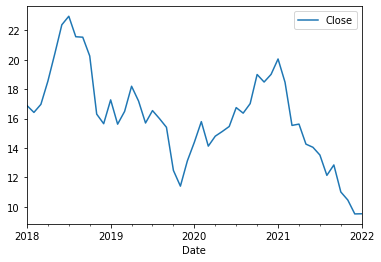

In [ ]:
df.plot() # ubisoft
plt.show()

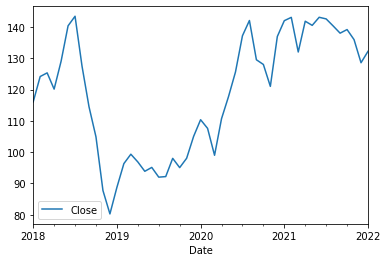

In [ ]:
df.plot() # ea
plt.show()

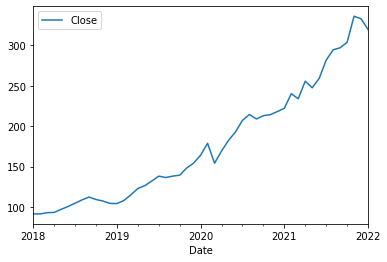

In [ ]:
df.plot() # microsift
plt.show()

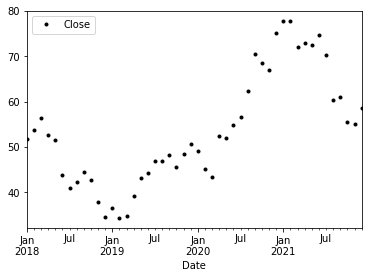

In [ ]:
df.plot(style='k.') # nuntendo
plt.show()

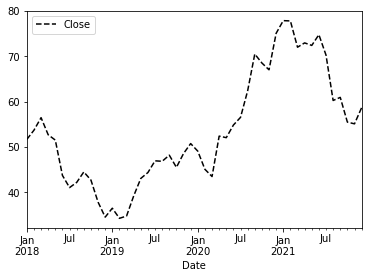

In [ ]:
df.plot(style='k--')
plt.show()

**17.	 Превратите объект DataFrame в переменной df в объект Series с помощью функции squeeze(). Результат запишите в переменную series.**

**18.	 Постройте сгруппированные по годам линейные графики. Это потребует выполнения следующих действий:**

**18.1.	Убедитесь в том, что Вы работаете с объектом Series, а не DataFrame. Превратить таблицу с одним столбцом целевых значений в объект Series можно с помощью функции squeeze()**

**18.2.	Импортируйте функции DataFrame и Grouper из модуля pandas.**

**18.3.	Сгруппируйте временной ряд по годам с помощью функции groupby(Grouper(freq='A')) и поместите результат в переменную groups.**

**18.4.	Создайте пустую таблицу данных с помощью функции DataFrame() и поместите результат в переменную years.**

**18.5.	С помощью команды for, перебирая период (name) и данные (group), содержащиеся в переменной groups, создайте в таблице данных years столбцы для каждого года (name.year), заполненные соответствующими данными о ценах на материал 1 (group.values).**

**18.6.	Постройте линейные графики друг под другом для всех годов, воспользовавшись функцией plot(subplots=True, legend=True) и функцией show() из модуля matplotlib.pyplot. Настроить график можно с помощью модуля matplotlib.**


In [ ]:
series=df.squeeze() # превращаем DataFrame в Series
# type(series)
series.sample(4)

Date
2021-04-30    72.93
2019-04-30    39.18
2019-06-30    44.35
2018-05-31    51.49
Name: Close, dtype: float64

In [ ]:
series.shape

(48,)

In [ ]:
# группируем по годам
groups=series.groupby(Grouper(freq='A')) # 'A' - значит разбтвка по годам

In [ ]:
years=DataFrame() # создаем пустой DataFrame

# **!!! Разбиваем с помощью for данные по годам и строим график**

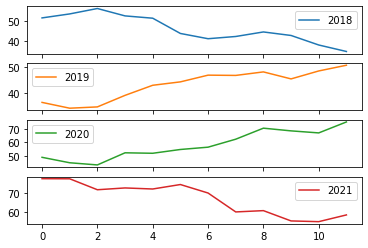

In [ ]:
for i, j in groups: # выводим графики для данных по годам
  years[i.year]=j.values
years.plot(subplots=True, legend=True)
plt.show()

**19.	 Постройте гистограмму для временного ряда, воспользовавшись функцией hist() и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

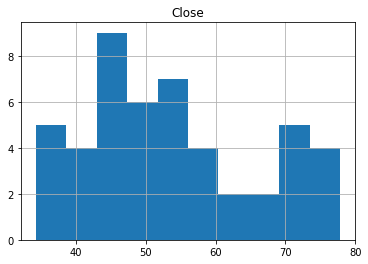

In [ ]:
df.hist()
plt.show()

**20.	 Постройте ядерную функцию плотности, воспользовавшись функцией plot(kind='kde') и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

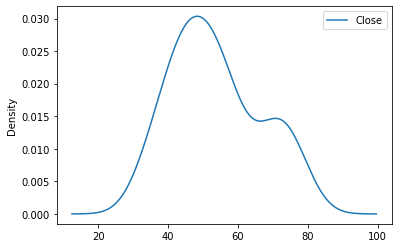

In [ ]:
df.plot(kind='kde')
plt.show()

**21.	 Постройте ящики с усами с разбивкой по годам, воспользовавшись функцией boxplot(), примененной к содержимому переменной years, и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

In [ ]:
df.shape

(48, 1)

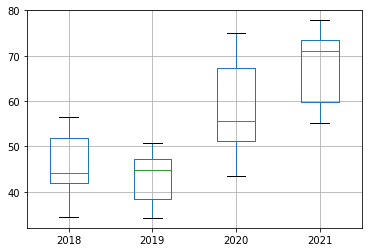

In [ ]:
years.boxplot()
plt.show()

**22.	 Постройте тепловую карту с разбивкой по годам, воспользовавшись функцией matshow(years.T, interpolation=None, aspect='auto') из модуля matplotlib.pyplot, примененной к транспонированному содержимому переменной years, и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

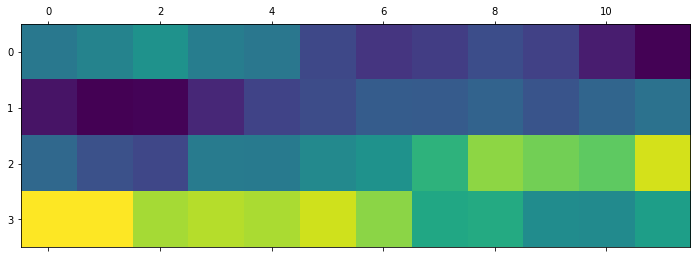

In [ ]:
plt.matshow(years.T, interpolation=None, aspect='auto')

plt.show()

# **ЗАДАНИЕ 2. ПРЕОБРАЗОВАНИЕ И АНАЛИЗ ДИНАМИКИ ВРЕМЕННОГО РЯДА**

Измените частоту представления данных по ценам на материал 1 в большую и в меньшую сторону, воспользуйтесь основными аналитическими характеристиками динамики для анализа и прогнозирования временного ряда.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


**Методика выполнения задания:**

# **Раздел 1. Изменение частоты представления данных и интерполяция**




In [ ]:
df.tail(20)

In [ ]:
df.shape

(48, 1)

**2.	Убедитесь в том, что Вы работаете с объектом Series, а не DataFrame. Превратить таблицу с одним столбцом целевых значений в объект Series можно с помощью функции squeeze().**

In [ ]:
series=df.squeeze() # переводим DataFrame в Series для дальнейшей работы
series.head(5)

Date
2018-01-31    51.64
2018-02-28    53.67
2018-03-31    56.44
2018-04-30    52.67
2018-05-31    51.49
Name: Close, dtype: float64

**3.	Перейдите к дневной разбивке данных, воспользовавшись функцией resample('D').mean(). Результат запишите в переменную upsampled. Выведите на экран первые 32 наблюдения, воспользовавшись функцией head(). Прокомментируйте результат.**

In [ ]:
upsampled=series.resample('D').mean() # переход от помесечной разбивки к разбивке по дням

In [ ]:
upsampled.head(32)

Date
2018-01-31    51.64
2018-02-01      NaN
2018-02-02      NaN
2018-02-03      NaN
2018-02-04      NaN
2018-02-05      NaN
2018-02-06      NaN
2018-02-07      NaN
2018-02-08      NaN
2018-02-09      NaN
2018-02-10      NaN
2018-02-11      NaN
2018-02-12      NaN
2018-02-13      NaN
2018-02-14      NaN
2018-02-15      NaN
2018-02-16      NaN
2018-02-17      NaN
2018-02-18      NaN
2018-02-19      NaN
2018-02-20      NaN
2018-02-21      NaN
2018-02-22      NaN
2018-02-23      NaN
2018-02-24      NaN
2018-02-25      NaN
2018-02-26      NaN
2018-02-27      NaN
2018-02-28    53.67
2018-03-01      NaN
2018-03-02      NaN
2018-03-03      NaN
Freq: D, Name: Close, dtype: float64

In [ ]:
upsampled.shape

(1431,)

In [ ]:
upsampled.isna().sum()

1383

**4.	Проведите интерполяцию данных на основе полинома 1-ой степени, воспользовавшись функцией interpolate(method='linear'). Результат запишите в переменную interpolated. Выведите на экран первые 32 наблюдения, воспользовавшись функцией head(). Каким будет значение цены 7 января 2007 года?**

**Интерполя́ция** (от лат. inter–polis — «разглаженный, подновлённый, обновлённый; преобразованный») — в вычислительной математике нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом.

**полином_1(первого)_порядка**

In [ ]:
interpolated=upsampled.interpolate(method='linear') # в качестве метода интерполяции используем линейную регрессию

In [ ]:
interpolated.head(15)

Date
2018-01-31    51.64
2018-02-01    51.72
2018-02-02    51.79
2018-02-03    51.86
2018-02-04    51.93
2018-02-05    52.01
2018-02-06    52.08
2018-02-07    52.15
2018-02-08    52.22
2018-02-09    52.30
2018-02-10    52.37
2018-02-11    52.44
2018-02-12    52.51
2018-02-13    52.59
2018-02-14    52.66
Freq: D, Name: Close, dtype: float64

In [ ]:
interpolated.isna().sum()

0

**5.	Постройте для интерполированного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

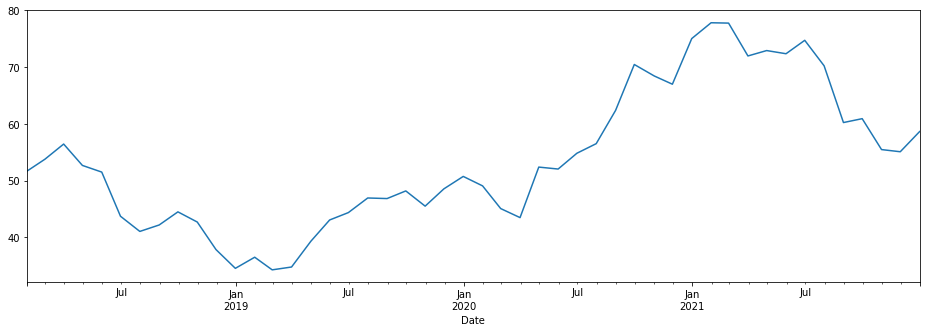

In [ ]:
plt.figure(figsize=(16, 5))
interpolated.plot()
plt.show()

**6.	Проведите интерполяцию данных на основе полинома 2-ой степени, воспользовавшись функцией interpolate(method='spline', order=2). Результат запишите в переменную interpolated. Выведите на экран первые 32 наблюдения, воспользовавшись функцией head(). Каким будет значение цены 7 января 2007 года?**

**полином_2(второго)_порядка**

In [ ]:
interpolated=upsampled.interpolate(method='spline', order=2)

In [ ]:
interpolated.head(32)

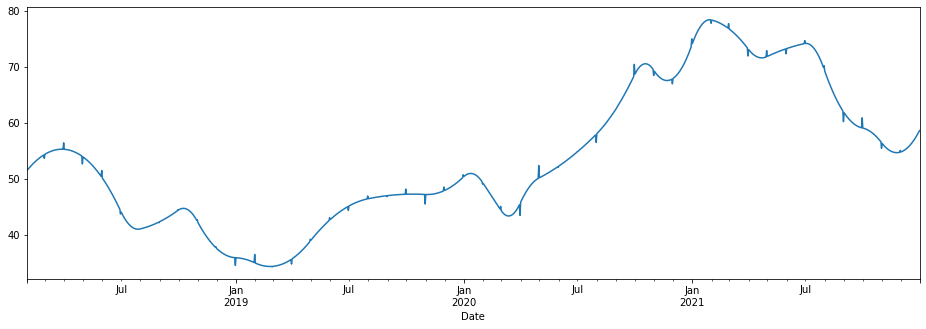

In [ ]:
plt.figure(figsize=(16, 5))
interpolated.plot()
plt.show()

**8.	Перейдите к квартальной разбивке данных для 2007 года, воспользовавшись функцией resample('Q'). Результат запишите в переменную resample. Для каждого квартала найдите среднеквартальное значение цены на материал 1, воспользовавшись функцией mean(). Результат запишите в переменную q_mean. Выведите на экран первые 5 наблюдений, воспользовавшись функцией head(). Прокомментируйте результат.**

**Месячная разбивка:**

In [ ]:
q_mean=series.resample('M').mean() # переходим к таблице по кварталам

In [ ]:
q_mean.head(10)

Date
2018-01-31    51.64
2018-02-28    53.67
2018-03-31    56.44
2018-04-30    52.67
2018-05-31    51.49
2018-06-30    43.70
2018-07-31    41.03
2018-08-31    42.16
2018-09-30    44.48
2018-10-31    42.68
Freq: M, Name: Close, dtype: float64

**9.	Постройте для преобразованного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. Что вы можете сказать о наблюдаемой тенденции?**

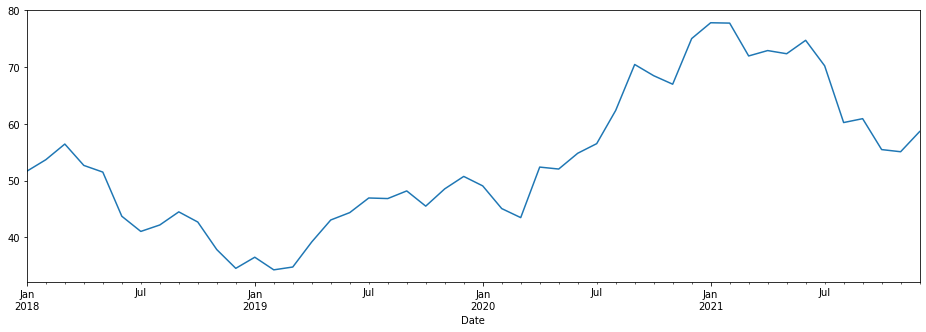

In [ ]:
plt.figure(figsize=(16, 5))
q_mean.plot()
plt.show()

**10. Перейдите к годовой разбивке данных, воспользовавшись функцией resample('A'). Результат запишите в переменную resample. Для каждого года найдите среднегодовое значение цены на материал 1, воспользовавшись функцией mean(). Результат запишите в переменную y_mean. Выведите на экран первые 5 наблюдений, воспользовавшись функцией head().**

In [ ]:
y_mean=series.resample('Q').mean()

In [ ]:
y_mean

**11. Постройте для преобразованного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot.**

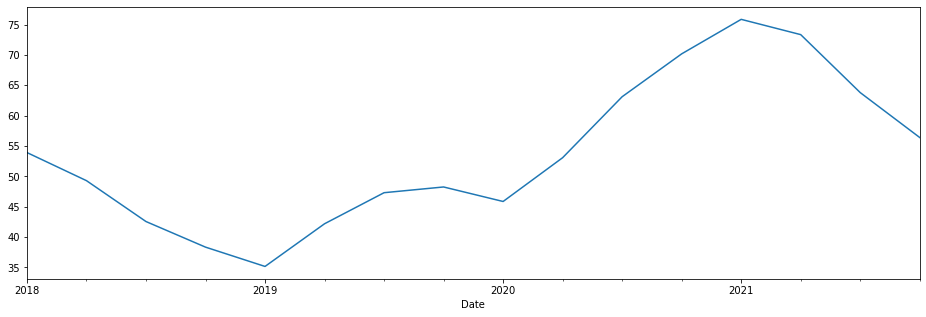

In [ ]:
plt.figure(figsize=(16, 5))
y_mean.plot()
plt.show()

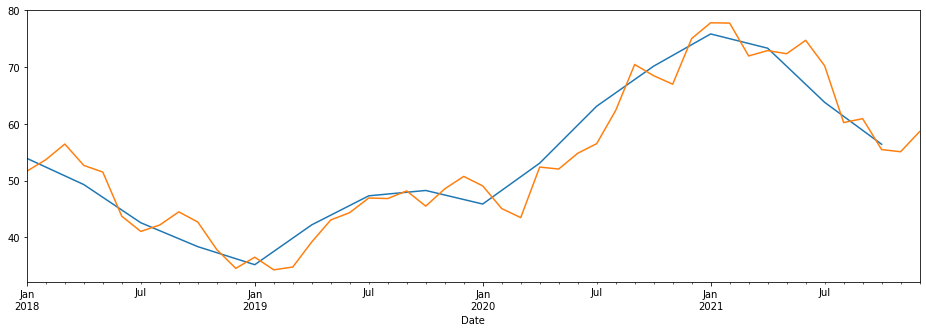

In [ ]:
plt.figure(figsize=(16, 5))
y_mean.plot() # выводим графика месячные и квартальные
q_mean.plot() # красный по кварталам
plt.show()


# **Раздел 2. Анализ динамики и прогнозирование временного ряда**

**12.	 Постройте таблицу данных на основе значений среднегодовой цены на материал 1 (y_mean.values), воспользовавшись функцией DataFrame() из модуля pandas, результат запишите в переменную values.**

In [ ]:
y_mean=series.resample('A').mean() # выводим значения по годам
y_mean

Date
2018-12-31    46.03
2019-12-31    43.22
2020-12-31    58.06
2021-12-31    67.35
Freq: A-DEC, Name: Close, dtype: float64

In [ ]:
values=pd.DataFrame(y_mean.values)
values

,0
0,46.03
1,43.22
2,58.06
3,67.35


**13.	Поместите в переменную df исходный ряд и сдвинутый на 1 шаг, воспользовавшись функцией concat([values.shift(1), values], axis=1) из модуля pandas. Дайте полученным столбцам названия 't' и 't+1', воспользовавшись следующей командой: df.columns = ['t', 't+1']. Выведите на экран первые 5 значений, воспользовавшись функцией head().**

In [ ]:
df=pd.concat([values.shift(1), values], axis=1) # создаем столбец со смещением на единицу

In [ ]:
df.columns = ['t-1', 't']

In [ ]:
df

,t-1,t
0,NaN,46.03
1,46.03,43.22
2,43.22,58.06
3,58.06,67.35


**14.	 Рассчитайте на основе полученной таблицы среднегодовых значений цены на материал 1основные показатели динамики за 4 года. Необходимые при этом формулы приведены в таблице ниже.**

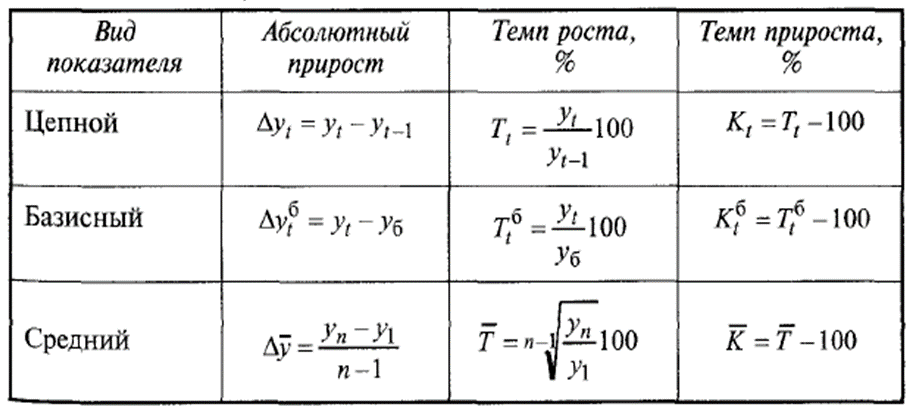

**Абсолютный прирост** - от последующего значения отнимаем предыдущее и получаем прирост, если получаем отрицательное значение, то убыль.

**Темп роста** - если Темп роста = 100%, то рост неизменим.
                 Средний темп роста показывает сколько в среднем процентов последующий уровень составляет от предыдущего.

**Темп прироста** - показывает на сколько изменился последующий уровень по-сравнению с базой или предыдущим уровнем

**Цепной** - каждый последующий уровень сравнивается с предыдущим

**Базисный** - все расчеты происходят от одной базы (одного значения)

**Средий** -
из последнего значения вычесть первое и разделить на n-1, где n - количество элементов ряда

**14.1.	Поместите в таблицу данных df столбцы с вычисленными значениями следующих показателей:**

1)	абсолютный цепной прирост (Delta_t),

2)	абсолютный базисный прирост (Delta_0),

3)	цепной темп роста (Temp_t),

4)	базисный темп роста (Temp_0),

5)	цепной темп прироста (TDelta_t),

6)	базисный темп прироста (TDelta_0).

В качестве базисного периода возьмите 2007 год. Выведите на экран полученный результат.


In [ ]:
df.head()

,t-1,t
0,NaN,46.03
1,46.03,43.22
2,43.22,58.06
3,58.06,67.35


In [ ]:
df['t'][0] # это база для абсолютного базисного прироста

46.025102388712234

In [ ]:
df['Delta_t']=df['t']-df['t-1'] # абсолютный цепной прирост (Delta_t)

In [ ]:
df['Delta_0']=df['t']-df['t'][0] # абсолютный базисный прирост (Delta_0),

In [ ]:
df['Temp_t']=df['t']/df['t-1'] # цепной темп роста (Temp_t)

In [ ]:
df['Temp_0']=df['t']/df['t'][0] # базисный темп роста (Temp_0)

In [ ]:
df['TDelta_t'] = df['Temp_t'] - 1 # цепной темп прироста (TDelta_t)

In [ ]:
df['TDelta_0'] = df['Temp_0'] - 1 # базисный темп прироста (TDelta_0)
df.head()

,t-1,t,Delta_t,Delta_0,Temp_t,Temp_0,TDelta_t,TDelta_0
0,NaN,46.03,NaN,0.00,NaN,1.00,NaN,0.00
1,46.03,43.22,-2.80,-2.80,0.94,0.94,-0.06,-0.06
2,43.22,58.06,14.83,12.03,1.34,1.26,0.34,0.26
3,58.06,67.35,9.29,21.32,1.16,1.46,0.16,0.46


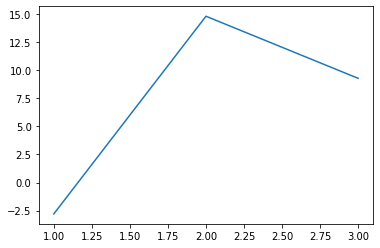

In [ ]:
df['Delta_t'].plot() # абсолютный цепной прирост (Delta_t)
plt.show()

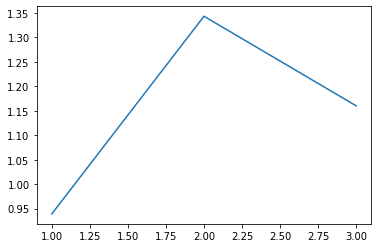

In [ ]:
df['Temp_t'].plot() # цепной темп роста (Temp_t)
plt.show()

**14.2.	Рассчитайте за 4 года средний абсолютный прирост (AvgDelta), средний темп роста (AvgTemp), средний темп прироста (AvgTDelta). Для нахождения первого и последнего значения временного ряда воспользуйтесь методом iloc[]. Прокомментируйте результат.**

In [ ]:
df

,t-1,t,Delta_t,Delta_0,Temp_t,Temp_0,TDelta_t,TDelta_0
0,NaN,46.03,NaN,0.00,NaN,1.00,NaN,0.00
1,46.03,43.22,-2.80,-2.80,0.94,0.94,-0.06,-0.06
2,43.22,58.06,14.83,12.03,1.34,1.26,0.34,0.26
3,58.06,67.35,9.29,21.32,1.16,1.46,0.16,0.46


In [ ]:
i_1 = df.iloc[0,1]
i_n = df.iloc[-1,1]
i_1,i_n

(46.025102388712234, 67.3482249468368)

In [ ]:
AvgDelta = (i_n - i_1)/(len(df.t)-1) # средний абсолютный прирост
AvgDelta

7.107707519374853

In [ ]:
AvgTemp = ((i_n/i_1)**(1/(len(df.t)-1))) # средний темп роста
AvgTemp

1.1352995441933351

In [ ]:
AvgTDelta = AvgTemp - 1 # средний темп прироста
AvgTDelta

0.13529954419333512

# **ПРОГНОЗ:**

_______________________________________________

**Прогноз на 2022 год исходя из абсолютного среднего прироста:**

In [ ]:
predict=i_n+AvgDelta # прогноз на 2022 года
predict

74.45593246621165

**Прогноз на 2023 год исходя из абсолютного среднего прироста:**


In [ ]:
predict=i_n+2*AvgDelta
predict

81.5636399855865

________________________________________

# **ЗАДАНИЕ 3. СГЛАЖИВАНИЕ ВРЕМЕННОГО РЯДА**
На основе методов простой и взвешенной скользящих средних для цен на материал 1 выявите тренд и дайте прогноз на год вперед.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from pandas import DataFrame
from pandas import concat

__________________________________________

# **ДАТАСЕТ**

In [ ]:
df=data[['Date','Close']]

In [ ]:
df = df[-1082:-74] # выбралданные с 2018 года по 2021 включительно

In [ ]:
df = df.drop(df.index[[300,550,551,800]])

In [ ]:
pd.set_option('precision', 2)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df=df.set_index('Date')

In [ ]:
series=df.squeeze() # переводим DataFrame в Series для дальнейшей работы
series.head(5)

Date
2018-01-02    45.90
2018-01-03    46.94
2018-01-04    48.53
2018-01-05    47.43
2018-01-08    47.56
Name: Close, dtype: float64

In [ ]:
series=series.resample('M').mean()

In [ ]:
df = series.reset_index()

In [ ]:
df = df.set_index('Date')

In [ ]:
df.shape

(48, 1)

_________________________________________

Методика выполнения задания:

# **Раздел 1. Простая скользящая средняя с фиксированным окном**


**3.	Преобразуйте набор данных о цене на материал 1 с помощью простой скользящей средней с размером окна 3 месяца. Воспользуйтесь набором функций rolling(window=3).mean(). Результат запишите в переменную rolling_mean.** **В данном случае преобразованное значение в момент времени (t) вычисляется, как среднее значение для предыдущих 3 наблюдений** (t-2, t-1, t): obs(t) =1/3*(obs(t - 2) + obs(t - 1) + obs(t)).

In [ ]:
series=df.squeeze() # переводим DataFrame в Series для дальнейшей работы
series.head(5)

Date
2018-01-31    51.64
2018-02-28    53.67
2018-03-31    56.44
2018-04-30    52.67
2018-05-31    51.49
Name: Close, dtype: float64

In [ ]:
# сглаживание нужно для поиска тренда

In [ ]:
rolling_mean=series.rolling(window=3).mean()
# расшфровка: из 3-х(окно) значений делает 1(берет среднее от 3-х) и записывает вместо 3-го,
# смещается на 1 строку вниз, опять берет 3 значения ...., так выравнивается ряд

In [ ]:
rolling_mean.head(10)

Date
2018-01-31      NaN
2018-02-28      NaN
2018-03-31    53.92
2018-04-30    54.26
2018-05-31    53.53
2018-06-30    49.29
2018-07-31    45.41
2018-08-31    42.30
2018-09-30    42.55
2018-10-31    43.11
Name: Close, dtype: float64

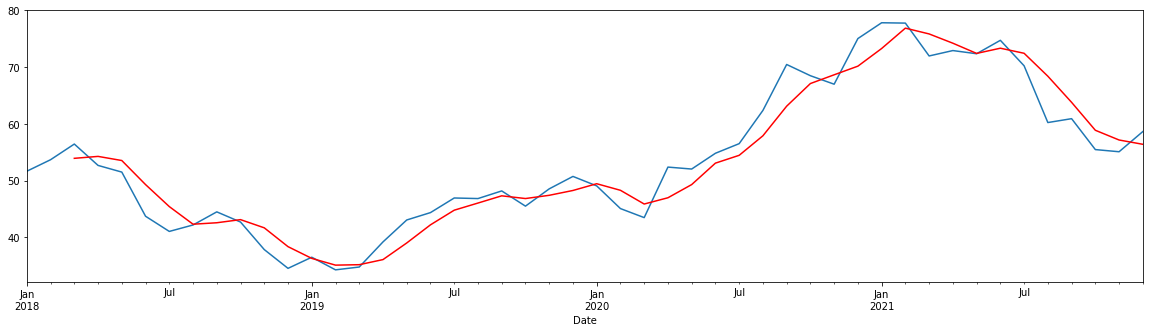

In [ ]:
plt.figure(figsize=(20, 5))
series.plot()
rolling_mean.plot(color='red')
plt.show()

**4.	Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных данных (rolling_mean), воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. График скользящей средней изобразите красным цветом, для этого в функции plot() задайте параметр color='red'. Прокомментируйте результат.**

**5.	Проделайте то же самое для ширины окна 5 месяцев. Сравните результаты. Какую ширину окна Вы выберете?**

In [ ]:
rolling_mean=series.rolling(window=5).mean()

In [ ]:
rolling_mean.head(10)

Date
2018-01-31      NaN
2018-02-28      NaN
2018-03-31      NaN
2018-04-30      NaN
2018-05-31    53.18
2018-06-30    51.60
2018-07-31    49.07
2018-08-31    46.21
2018-09-30    44.57
2018-10-31    42.81
Name: Close, dtype: float64

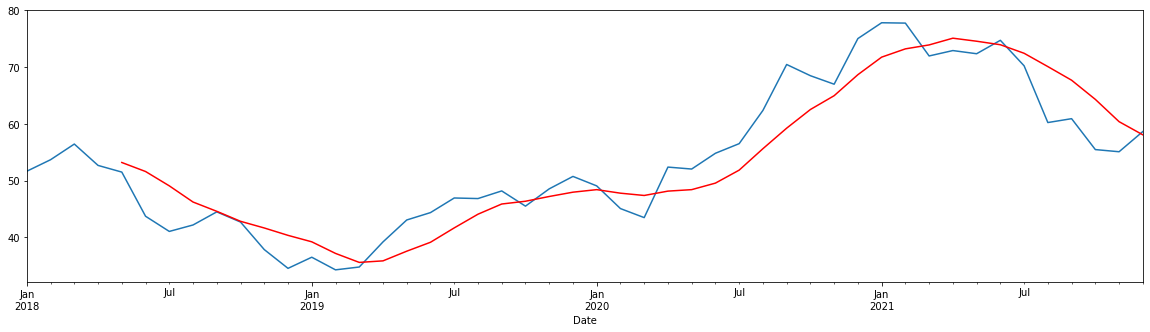

In [ ]:
plt.figure(figsize=(20, 5))
series.plot()
rolling_mean.plot(color='red')
plt.show()

# **дЕЛАЕМ ПРОГНОЗ В ПОШАГОВОМ РЕЖИМЕ: делаем шаг (ширина окна), прогнозируем, делаем еще шаг, прогнозируем и т.д.**

**6.	Воспользуйтесь моделью простой скользящей средней с выбранной Вами шириной окна для прогнозирования значений временного ряда в пошаговом режиме. При этом прогнозируемое и ожидаемое значение печатается на каждом временном шаге. Это потребует выполнения следующих действий:**

# **СКОЛЬЗЯЩАЯ СРЕДНЯЯ С ЗАДAННОЙ ШИРИНОЙ ОКНА**

**6.1.	Запишите в переменную X значения временного ряда, обратившись к атрибуту values.**

In [ ]:
X=series.values

**6.2.	В переменной window задайте выбранную Вами ширину окна.**

In [ ]:
window =3

**6.3.	В переменную history поместите список значений временного ряда в пределах ширины окна, создав его методом спискового включения [X[i] for i in range(window)].**

не совсем понял откуда эти значения

In [ ]:
history =[X[i] for i in range(window)]
history

[51.6447619047619, 53.67473684210527, 56.43714285714286]

**6.4.	В переменную test поместите список значений временного ряда в интервале от окончания ширины окна до длины временного ряда, создав его методом спискового включения [X[i] for i in range(window, len(X))].**

In [ ]:
test =[X[i] for i in range(window, len(X))]
test

[52.66809523809523,
 51.49181818181818,
 43.70428571428571,
 41.025238095238095,
 42.16347826086957,
 44.47526315789474,
 42.68086956521739,
 37.82238095238095,
 34.51315789473684,
 36.474761904761905,
 34.24842105263158,
 34.748000000000005,
 39.17666666666667,
 43.04409090909091,
 44.346500000000006,
 46.92318181818182,
 46.822272727272725,
 48.1695,
 45.48521739130435,
 48.5335,
 50.727619047619044,
 49.05761904761905,
 45.055263157894736,
 43.4615,
 52.37333333333333,
 52.029999999999994,
 54.810909090909085,
 56.50772727272727,
 62.36857142857143,
 70.47095238095237,
 68.49318181818181,
 66.9935,
 75.04318181818182,
 77.83263157894737,
 77.77105263157895,
 71.97636363636364,
 72.92714285714285,
 72.3685,
 74.73545454545454,
 70.24047619047619,
 60.23,
 60.913809523809526,
 55.46190476190476,
 55.080000000000005,
 58.64136363636363]

**6.5.	Создайте пустой список с помощью функции list() и запишите его в переменную predictions.**

In [ ]:
predictions=list()

**6.6.	Перебирайте временные периоды t тестового набора range(len(test)) с помощью цикла for и для каждого наблюдения выполняйте следующие действия:**

**6.6.1.	С помощью функции len() определите длину исторических данных (history) и результат запишите в переменную length.**

**6.6.2.	Создайте список значений временного ряда для расчета скользящей средней с помощью метода спискового включения [history[i] for i in range(length-window,length)]. Найдите среднее значение списка с помощью функции mean(). Результат запишите в переменную yhat.**

**6.6.3.	Наблюдаемое на данном шаге значение test[t] запишите в переменную obs.**

**6.6.4.	В список predictions добавьте найденный прогноз с помощью функции append(yhat).**

**6.6.5.	В список history добавьте новое наблюдаемое значение с помощью функции append(obs).**

**6.6.6.	Выведите на экран прогнозное и наблюдаемое на каждом шаге значение временного ряда с помощью функции print('predicted=%f, expected=%f' % (yhat, obs)).**


In [ ]:
# делаем прогноз пошагово, т.е. по 3-ем делаем прогноз (см. в predicted), а фактическое значение см. в expected,
# затем смещаемся и опять ....
for t in range(len(test)):
  length=len(history)
  yhat=np.mean([history[i] for i in range(length-window,length)])
  obs=test[t]
  predictions.append(yhat)
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=53.918881, expected=52.668095
predicted=54.259992, expected=51.491818
predicted=53.532352, expected=43.704286
predicted=49.288066, expected=41.025238
predicted=45.407114, expected=42.163478
predicted=42.297667, expected=44.475263
predicted=42.554660, expected=42.680870
predicted=43.106537, expected=37.822381
predicted=41.659505, expected=34.513158
predicted=38.338803, expected=36.474762
predicted=36.270100, expected=34.248421
predicted=35.078780, expected=34.748000
predicted=35.157061, expected=39.176667
predicted=36.057696, expected=43.044091
predicted=38.989586, expected=44.346500
predicted=42.189086, expected=46.923182
predicted=44.771258, expected=46.822273
predicted=46.030652, expected=48.169500
predicted=47.304985, expected=45.485217
predicted=46.825663, expected=48.533500
predicted=47.396072, expected=50.727619
predicted=48.248779, expected=49.057619
predicted=49.439579, expected=45.055263
predicted=48.280167, expected=43.461500
predicted=45.858127, expected=52.373333


**7.	Рассчитайте и выведите на экран корень квадратный из среднеквадратичной ошибки (RMSE) для всех сделанных прогнозов, воспользовавшись функцией sqrt() из модуля math для извлечения корня квадратного и функцией mean_squared_error(test, predictions) из модуля sklearn.metrics для нахождения средней квадратичной ошибки. Прокомментируйте результат.**

In [ ]:
RMSE=sqrt(mean_squared_error(test, predictions)) # хороший показатель по сравнению споказателями 46, 47 - 1.3 - это очень мало
RMSE

5.3406377519666

In [ ]:
R2=r2_score(test, predictions)
R2

0.8259822654808896

**8.	Поместите на одну диаграмму линейный график исходных данных (test) и спрогнозированных данных (predictions), воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. Прогнозный график изобразите красным цветом, задав в функции plot() параметр color='red'. Прокомментируйте результат.**

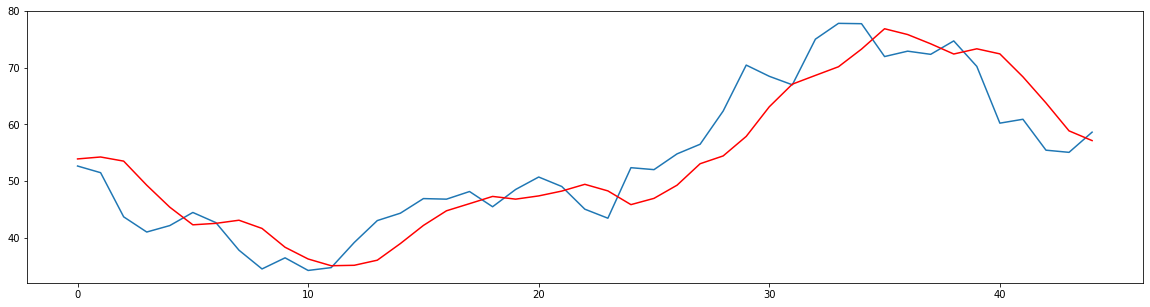

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(test) # фактические значения
plt.plot(predictions, color='red') # прогнозные значения, которые определялись на
                                   # каждом шаге сучетом поступающей информации
plt.show()

# **Раздел 2. Простая скользящая средняя с расширяющимся окном**

**9.	Найдите простую среднюю для расширяющегося окна, воспользовавшись сочетанием функций expanding().mean(). Результат запишите в переменную exp_mean. Выведите на экран первые 10 наблюдений, воспользовавшись функцией head(). Прокомментируйте результат.**


In [ ]:
exp_mean=series.expanding().mean()

In [ ]:
exp_mean.head(10)

Date
2018-01-31    51.64
2018-02-28    52.66
2018-03-31    53.92
2018-04-30    53.61
2018-05-31    53.18
2018-06-30    51.60
2018-07-31    50.09
2018-08-31    49.10
2018-09-30    48.59
2018-10-31    48.00
Name: Close, dtype: float64

**10.	Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных данных (expanding_mean), воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. График преобразованных данных изобразите красным цветом, задав в функции plot() параметр color='red'. Прокомментируйте результат.**

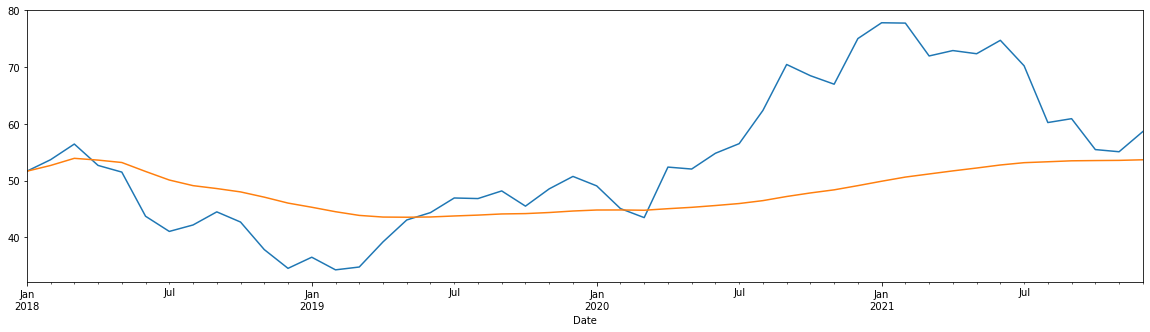

In [ ]:
plt.figure(figsize=(20, 5))
series.plot()
exp_mean.plot()
plt.show()

# **Раздел 3. Взвешенная скользящая средняя с фиксированным окном**

**11.	 Задайте веса в линейно возрастающем порядке. Пусть ширина окна равна 5. Сначала сгенерируйте 5 целых чисел от 1 до 6 не включительно с помощью функции arange() из модуля numpy. Результат запишите в переменную fig. Нормируйте полученные числа путем их деления на сумму списка, найденную с помощью функции sum(). Запишите полученный результат в переменную weights и выведите ее содержимое на экран.**


# **!!!!!!!!!!! создаем_свои_веса**

In [ ]:
fig=np.arange(1,6)
fig

array([1, 2, 3, 4, 5])

In [ ]:
# пояснеие: эти веса не самрегулируются, а задаются мной

In [ ]:
weights = fig/fig.sum() # здесь получаем чтобы веса в сумме давали единицу
weights

array([0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333])

In [ ]:
# пояснение: количество весов weights и ширина окна rolling(5) д.б. равны, т.к. первый вес умножается на первое
# значение окна потом прибавляется второй вес умноженный на второе значение окна и т.д., итоговая сумма будет
# нашим значением

**12.	 Далее вычислите взвешенную скользящую среднюю, воспользовавшись функцией rolling(5), чтобы задать скользящее окно, и написанной вами lambda функцией для вычисления средней взвешенной, применить которую к данным можно с помощью функции  apply(lambda series: np.dot(series,weights, raw=True). Последние наблюдения имеют большие веса, чем первые, в соответствии с заданным правилом. Результат запишите в переменную wma51. Выведите на экран первые 10 наблюдений, воспользовавшись функцией head(). Прокомментируйте результат.**

In [ ]:
# здесь получаем ряд выравнивания с использованием весов(заданных)
wma51=series.rolling(5).apply(lambda x: np.dot(x,weights), raw=True)
wma51.head(10)

Date
2018-01-31      NaN
2018-02-28      NaN
2018-03-31      NaN
2018-04-30      NaN
2018-05-31    53.10
2018-06-30    49.94
2018-07-31    46.41
2018-08-31    44.11
2018-09-30    43.53
2018-10-31    42.90
Name: Close, dtype: float64

**13.	 Найдите простую скользящую среднюю для такой же ширины окна, воспользовавшись сочетанием функций rolling(5).mean(). Результат запишите в переменную sma5.**

In [ ]:
sma5=series.rolling(5).mean() # простая скользящая средняя без весов
sma5

Date
2018-01-31      NaN
2018-02-28      NaN
2018-03-31      NaN
2018-04-30      NaN
2018-05-31    53.18
2018-06-30    51.60
2018-07-31    49.07
2018-08-31    46.21
2018-09-30    44.57
2018-10-31    42.81
2018-11-30    41.63
2018-12-31    40.33
2019-01-31    39.19
2019-02-28    37.15
2019-03-31    35.56
2019-04-30    35.83
2019-05-31    37.54
2019-06-30    39.11
2019-07-31    41.65
2019-08-31    44.06
2019-09-30    45.86
2019-10-31    46.35
2019-11-30    47.19
2019-12-31    47.95
2020-01-31    48.39
2020-02-29    47.77
2020-03-31    47.37
2020-04-30    48.14
2020-05-31    48.40
2020-06-30    49.55
2020-07-31    51.84
2020-08-31    55.62
2020-09-30    59.24
2020-10-31    62.53
2020-11-30    64.97
2020-12-31    68.67
2021-01-31    71.77
2021-02-28    73.23
2021-03-31    73.92
2021-04-30    75.11
2021-05-31    74.58
2021-06-30    73.96
2021-07-31    72.45
2021-08-31    70.10
2021-09-30    67.70
2021-10-31    64.32
2021-11-30    60.39
2021-12-31    58.07
Name: Close, dtype: float64

**14.	Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных на основе простой (sma5) и взвешенной скользящей средней (wma51) для ширины окна 5, воспользовавшись функцией figure(figsize = (12,6)), plot(data, label=label), а также функцией show() из модуля matplotlib.pyplot. Подпишите оси с помощью функций xlabel("Date") и ylabel("Price") из модуля matplotlib.pyplot. Создайте легенду с помощью функции legend() из модуля matplotlib.pyplot. Прокомментируйте результат.**

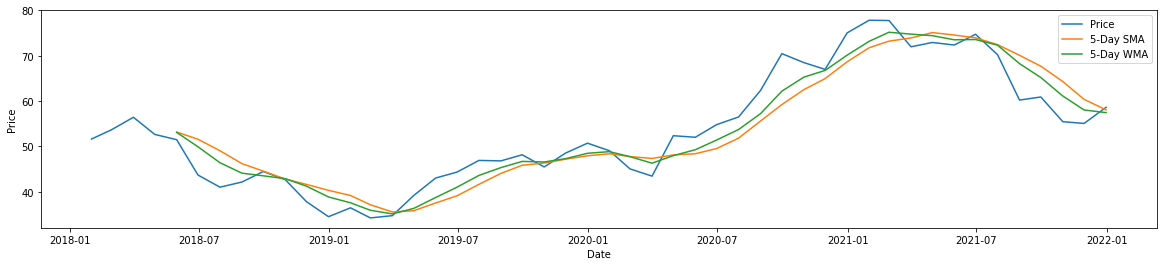

In [ ]:
plt.figure(figsize = (20,4))

plt.plot(series, label='Price')
plt.plot(sma5, label='5-Day SMA')
plt.plot(wma51, label='5-Day WMA')

plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()
plt.show()

**15.	 Измените веса в формуле взвешенной скользящей средней. Воспользуйтесь весами для сглаживания по полиномам 2-го или 3-го порядка для ширины окна, равной 5: [-3/35,12/35,17/35,12/35,-3/35] . Создайте список весов с помощью функции array из модуля numpy. Результат запишите в переменную weights.**

Если мы берем **полиномы 2-го или 3-го** порядка, то существует **таблица** для задания ширины окна.

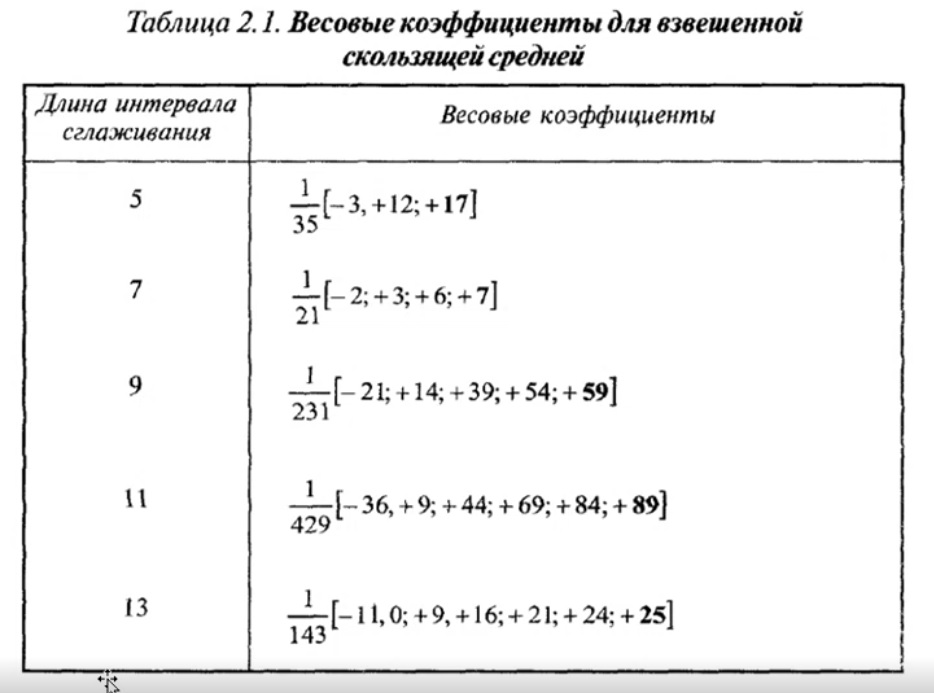

In [ ]:
weights=np.array([-3/35,12/35,17/35,12/35,-3/35])
weights

array([-0.08571429,  0.34285714,  0.48571429,  0.34285714, -0.08571429])

**16.	Воспользуйтесь приемом, описанным в п. 12, для нахождения взвешенной скользящей средней. Результат запишите в переменную wma52. Выведите на экран первые 10 значений с помощью функции head(). Сравните их с предыдущим результатом. Прокомментируйте результат.**

In [ ]:
wma52=series.rolling(5).apply(lambda x: np.dot(x,weights), raw=True)
wma52.head(10)

Date
2018-01-31      NaN
2018-02-28      NaN
2018-03-31      NaN
2018-04-30      NaN
2018-05-31    55.03
2018-06-30    54.24
2018-07-31    49.70
2018-08-31    44.82
2018-09-30    41.14
2018-10-31    42.39
Name: Close, dtype: float64

**17.	 Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных на основе простой (sma5) и двух версий взвешенной скользящей средней для ширины окна 5 (wma51, wma52), воспользовавшись функцией figure(figsize = (12,6)), plot(data, label=label), а также функцией show() из модуля matplotlib.pyplot. Подпишите оси с помощью функций xlabel("Date") и ylabel("Price") из модуля matplotlib.pyplot. Создайте легенду с помощью функции legend() из модуля matplotlib.pyplot. Прокомментируйте результат.**

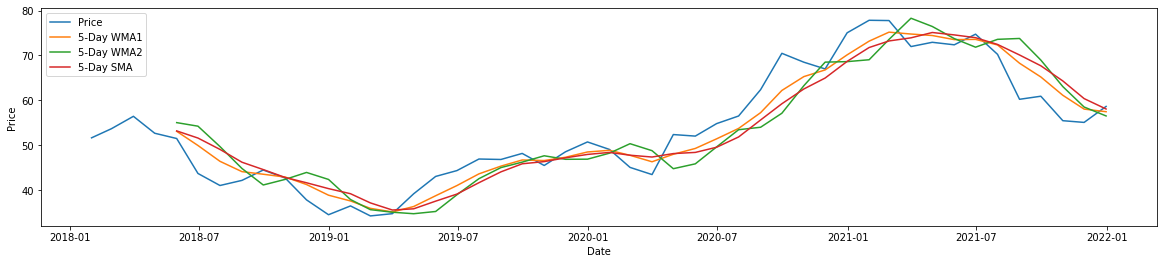

In [ ]:
plt.figure(figsize = (20,4))

plt.plot(series, label='Price')
plt.plot(wma51, label='5-Day WMA1')
plt.plot(wma52, label='5-Day WMA2') # зеленая более подходящая она с каким-то сдвигом более всего угадывает
plt.plot(sma5, label='5-Day SMA')   # зеленая более других угадывает амплтьуду, поэтому лучше она

plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()
plt.show()

predicted=55.032448, expected=43.704286
predicted=55.713060, expected=41.025238
predicted=51.376089, expected=42.163478
predicted=44.443166, expected=44.475263
predicted=41.634195, expected=42.680870
predicted=42.389419, expected=37.822381
predicted=42.893583, expected=34.513158
predicted=40.660869, expected=36.474762
predicted=37.897779, expected=34.248421
predicted=34.391433, expected=34.748000
predicted=35.071393, expected=39.176667
predicted=34.955311, expected=43.044091
predicted=37.880203, expected=44.346500
predicted=41.703618, expected=46.923182
predicted=46.049251, expected=46.822273
predicted=45.014313, expected=48.169500
predicted=44.243499, expected=45.485217
predicted=45.080456, expected=48.533500
predicted=47.114142, expected=50.727619
predicted=48.418521, expected=49.057619
predicted=48.226919, expected=45.055263
predicted=48.493854, expected=43.461500
predicted=47.800008, expected=52.373333
predicted=49.665070, expected=52.030000
predicted=50.111601, expected=54.810909


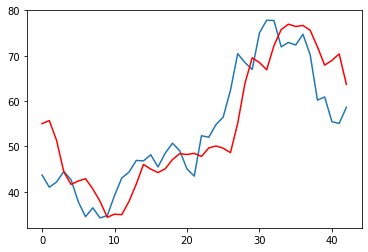

In [ ]:
X = series.values
weights=[-3/35,12/35,17/35,12/35,-3/35]*10
window = 5
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = np.sum([history[i]*weights[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

_________________________________

# **ЗАДАНИЕ 4. МОДЕЛИРОВАНИЕ ТРЕНДА НА ОСНОВЕ КРИВЫХ РОСТА**

Постройте модель тренда, описывающую ряд данных по ценам на материал 1. Рассчитайте показатели точности и адекватности построенной модели. Дайте точечный и интервальный прогнозы на 1 год вперёд по построенной модели.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from math import sqrt
from pandas import concat
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from pandas.plotting import autocorrelation_plot
import scipy.stats
import seaborn as sns
from scipy.stats import t as student

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**2.	Убедитесь в том, что Вы работаете с объектом Series, а не DataFrame. Превратить таблицу с одним столбцом целевых значений в объект Series можно с помощью функции squeeze(). Дайте ему название series.**

In [ ]:
series=df.squeeze()
series

**3.	Посмотрите на возможность построения линейного тренда визуально с помощью функции regplot(x=x, y=y, data= data) из модуля seaborn. В качестве x возьмите номера наблюдений, а y – значения цены на материал 1. Прокомментируйте результат.**

In [ ]:
y=series.values

In [ ]:
t=np.arange(1,len(y)+1)


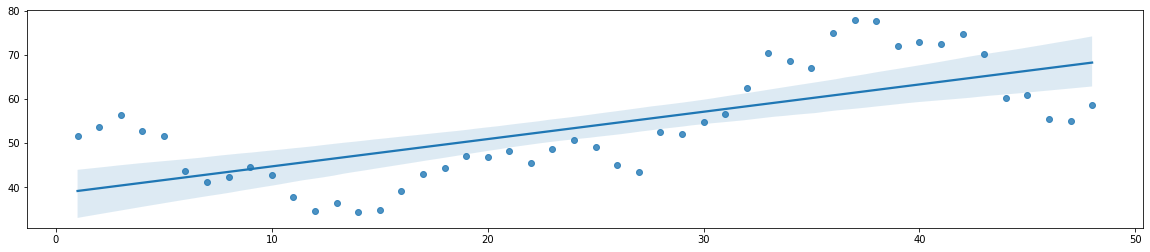

In [ ]:
plt.figure(figsize = (20,4))
sns.regplot(x=t, y=y, data=series)
# синий диапазон - это граица случайных колебаний

**4.	Разделите исходные данные на обучающий и тестовый набор в пропорции 80%:20%. Для этого создайте переменную y, в которую запишите значения временного ряда, обратившись к параметру values. Затем создайте переменную train, содержащую обучающую выборку, которая составляет 80% от количества наблюдений, и переменную test, содержащую тестовый набор из 20% выборки. Выведите на экран объем обучающей и тестовой выборки.**

In [ ]:
y=series.values

In [ ]:
train_size=int(len(y)*0.8)
train_size

38

In [ ]:
# разбиваем данные в соотношении 80% к 20% - это для оси Y (т.е. получаем 2 набора данных)
y_train, y_test=y[0:train_size], y[train_size:len(y)]

In [ ]:
# y_train - это ось Y для графика тренировки, это набор данных обучающе выборки

**6.	Поместите в переменную t_train номера наблюдений обучающего набора, воспользовавшись функцией arange() из модуля numpy. Выведите на экран содержимое t_train.**

In [ ]:
x_train =np.arange(1, len(y_train)+1) # это ось X для графика тренировки

In [ ]:
x_train

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38])

In [ ]:
y_train

array([51.6447619 , 53.67473684, 56.43714286, 52.66809524, 51.49181818,
       43.70428571, 41.0252381 , 42.16347826, 44.47526316, 42.68086957,
       37.82238095, 34.51315789, 36.4747619 , 34.24842105, 34.748     ,
       39.17666667, 43.04409091, 44.3465    , 46.92318182, 46.82227273,
       48.1695    , 45.48521739, 48.5335    , 50.72761905, 49.05761905,
       45.05526316, 43.4615    , 52.37333333, 52.03      , 54.81090909,
       56.50772727, 62.36857143, 70.47095238, 68.49318182, 66.9935    ,
       75.04318182, 77.83263158, 77.77105263])

In [ ]:
len(x_train),len(y_train)

(38, 38)

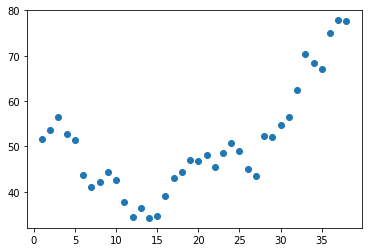

In [ ]:
plt.scatter(x_train,y_train)
#plt.scatter((0,38),coef)
plt.show()

**7.	На основе переменной t_train, которая выступает в качестве факторного признака, и переменной y_train с ценами на материал 1 из обучающего набора в качестве результативного признака обучите полином первой степени, воспользовавшись функцией polyfit() из модуля numpy. Результат запишите в переменную coef. Выведите на экран полученные коэффициенты модели.**

# **МОДЕЛЬ ЛИНЕЙНОГО ТРЕНДА**

Метод, который работает позади метода полифита, называется обычным методом наименьших квадратов.

In [ ]:
coef=np.polyfit(x_train,y_train, deg=1)
coef # первое число - значение при факторе, второе - свободный член

array([ 0.68203695, 37.31265797])

# **____________________ВСТАВКА___________________________**

**РАЗЪЯСНЕНИЕ:** значения coef - это значения свободных членов для уравнения прямой

**у = 0.35096728 * х + 25.69587482**

In [ ]:
x_test=np.arange(len(y_train)+1, len(y)+1)
x_test

array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

_______________________________________________________________

In [ ]:
predict = np.poly1d(coef)
y_pred = predict(x_test)

In [ ]:
y_pred

_________________________________________________________________

**Шаг 6: точность модели**

Мы также можем проверить точность модели, дает ли она правильные результаты или нет. Точность модели можно рассчитать с помощью R-квадрата (R2). Значение R-квадрата (R2) находится между 0 и 1. Результат, близкий к 1, показывает, что точность модели высока. Итак, проверим точность приведенной выше модели. Мы импортируем другую библиотеку, sklearn, как показано ниже:

In [ ]:
y_test

array([71.97636364, 72.92714286, 72.3685    , 74.73545455, 70.24047619,
       60.23      , 60.91380952, 55.46190476, 55.08      , 58.64136364])

In [ ]:
len(y_test),len(y_pred)

(10, 10)

In [ ]:
from sklearn.metrics import r2_score # получилось, но предсказывает фигово
r2_score(y_test,y_pred)

-0.5890899363734492

**в уравнении у = 0.35096728 * х + 25.69587482 находим Y через X методом numpy**

**8.	Поместите в переменную t_test номера наблюдений тестового набора, воспользовавшись функцией arange() из модуля numpy. Выведите на экран содержимое t_ test.**

**11.	Аналогично найдите расчетные значения цены на материал 1 по модели линейного тренда с помощью функции linregress(t_train, y_train) из модуля scipy.stats. Рассчитайте коэффициент детерминации для тестового набора. Сравните полученный результат с предыдущим из п.9.**

**МОДЕЛЬ ЛИНЕЙНОГО ТРЕНДА**

In [ ]:
coef=linregress(x_train, y_train)
coef

LinregressResult(slope=0.6820369514501152, intercept=37.31265796622204, rvalue=0.6435178667308858, pvalue=1.3118577273381563e-05, stderr=0.1352079237416687)

In [ ]:
y_pred=coef[0]*x_test+coef[1]
y_pred

array([63.91209907, 64.59413602, 65.27617298, 65.95820993, 66.64024688,
       67.32228383, 68.00432078, 68.68635773, 69.36839468, 70.05043164])

In [ ]:
R2=r2_score(y_test,y_pred)
R2

-0.5890899363734483

**12.	Обучите на обучающем наборе данных модель линейного тренда на основе функций LinearRegression().fit() из модуля sklearn.linear_model. Выведите на экран полученные коэффициенты модели, воспользовавшись параметром coef_ для вывода коэффициента при номере наблюдения и параметром intercept_ - для свободного члена. Не забудьте перед этим превратить строку в переменной t_train в столбец, воспользовавшись функцией reshape(-1,1).**

# **МОДЕЛЬ ЛИНЕЙНОЙ РЕГРЕССИИ**

In [ ]:
x_train=x_train.reshape(-1,1)

In [ ]:
model=LinearRegression().fit(x_train, y_train)

In [ ]:
model.coef_ # см. п.7,  проще говоря (коэффициент при номере наблюдения) это значение 'a' в
            # в формуле у = aх — b


array([0.68203695])

In [ ]:
model.intercept_ # см. п.7,  проще говоря (коэффициент при номере наблюдения) это значение 'b' в
                 # в формуле у = aх — b

37.31265796622204

**получим: у = 0.35096728 * х — 25.69587482**

**13.	Найдите расчетные значения цены на материал 1 для тестового набора данных по модели линейного тренда, воспользовавшись функцией predict(). Выведите на экран полученный результат. Не забудьте перед этим превратить строку в переменной t_test в столбец, воспользовавшись функцией reshape(-1,1).**

In [ ]:
t_test =x_test.reshape(-1,1)

In [ ]:
y_pred=model.predict(t_test)
y_pred

array([63.91209907, 64.59413602, 65.27617298, 65.95820993, 66.64024688,
       67.32228383, 68.00432078, 68.68635773, 69.36839468, 70.05043164])

**14.	Оцените точность модели на тестовой выборке на основе коэффициента детерминации, воспользовавшись функцией r2_score(y_test, y_pred) из модуля sklearn.metrics. Сравните результат с полученными ранее.**

In [ ]:
R2=r2_score(y_test, y_pred)
R2

-0.5890899363734483

**15.	Оцените точность модели на тестовой выборке на основе средней абсолютной ошибки (MAE), воспользовавшись функцией mean_absolute_error(y_test, y_pred) из модуля sklearn.metrics.**

In [ ]:
MAE=mean_absolute_error(y_test, y_pred)
MAE

8.89717830936122

**16.	Оцените точность модели на тестовой выборке на основе средней квадратичной ошибки (MSE), воспользовавшись функцией mean_squared_error(y_test, y_pred) из модуля sklearn.metrics.**

In [ ]:
MSE=mean_squared_error(y_test, y_pred)
MSE

88.4561194113623

**17.	Оцените точность модели на тестовой выборке на основе корня квадратного из среднеквадратичной ошибки (RMSE) для всех сделанных прогнозов, воспользовавшись функцией sqrt() из модуля math и функцией mean_squared_error(y_test, y_pred) из модуля sklearn.metrics.**

In [ ]:
RMSE=sqrt(MSE)
RMSE

9.405111344974195

**18.	Рассчитайте прогнозные значения на тестовой выборке по базовой модели, которая в качестве прогноза выдает прошлое значение. Результат запишите в переменную y_pred.**

In [ ]:
y_pred=y[len(y_train)-1:len(y)-1]
y_pred

array([77.77105263, 71.97636364, 72.92714286, 72.3685    , 74.73545455,
       70.24047619, 60.23      , 60.91380952, 55.46190476, 55.08      ])

In [ ]:
MSE=mean_squared_error(y_test, y_pred) # ошибка осталась прежней
MSE

20.383144450714536

**19.	Оцените точность базовой модели на тестовой выборке на основе средней квадратичной ошибки (MSE), воспользовавшись функцией mean_squared_error(y_test, y_pred) из модуля sklearn.metrics. Сравните результат с аналогичным показателем линейного тренда.**

**ОБУЧАЕМ НА ВСЕХ ДАННЫХ ЛУЧШУЮ МОДЕЛЬ**

In [ ]:
t=np.arange(1,len(y)+1) #
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [ ]:
t=t.reshape(-1,1) # превращаем строчку в столбец
t

**20.	Обучите на всех данных лучшую модель. Запишите ее уравнение.**

In [ ]:
model=LinearRegression().fit(t,y) # создаем объект и обучаем

In [ ]:
model.coef_

array([0.61969871])

In [ ]:
model.intercept_

38.480827392434946

In [ ]:
y_pred=model.predict(t) # обученная на наших данных модель спрогнозировала ниши данные
                        # по уравнению y=ax-b, где a = model.coef_ и b = model.intercept_
y_pred

array([39.1005261 , 39.72022481, 40.33992353, 40.95962224, 41.57932095,
       42.19901966, 42.81871837, 43.43841708, 44.05811579, 44.6778145 ,
       45.29751321, 45.91721192, 46.53691063, 47.15660935, 47.77630806,
       48.39600677, 49.01570548, 49.63540419, 50.2551029 , 50.87480161,
       51.49450032, 52.11419903, 52.73389774, 53.35359645, 53.97329517,
       54.59299388, 55.21269259, 55.8323913 , 56.45209001, 57.07178872,
       57.69148743, 58.31118614, 58.93088485, 59.55058356, 60.17028228,
       60.78998099, 61.4096797 , 62.02937841, 62.64907712, 63.26877583,
       63.88847454, 64.50817325, 65.12787196, 65.74757067, 66.36726938,
       66.9869681 , 67.60666681, 68.22636552])

**21.	Найдите расчетные значения по модели для всех данных. Рассчитайте ошибки модели для всех данных. Поместите столбец ошибок 'Error' в таблицу исходных данных. Выведите на экран первые 5 наблюдений.**

In [ ]:
data = df

In [ ]:
data['Error']=y-y_pred # добавляем столбец в котором выводим разницу между фактическим значением и расчетным

In [ ]:
data.sample(3)

,Close,Error
Date,,
2021-01-31,77.83,16.42
2019-06-30,44.35,-5.29
2018-12-31,34.51,-11.40


**22.	Постройте линейный график ошибок, воспользовавшись функцией plot() и командой pyplot.show() из модуля matplotlib. Прокомментируйте результат.**

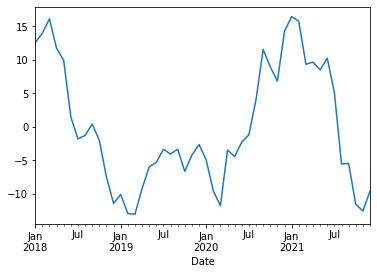

In [ ]:
data.Error.plot() # график говорит о том что среднее = 0 , это хорошо
plt.show()

**23.	Выведите на экран описательные статистики ошибок, воспользовавшись функцией describe(). Прокомментируйте результат.**

In [ ]:
data.Error.describe()

count    4.80e+01
mean     7.55e-15
std      9.05e+00
min     -1.30e+01
25%     -6.14e+00
50%     -2.44e+00
75%      9.04e+00
max      1.64e+01
Name: Error, dtype: float64

**24.	Постройте для ошибок гистограмму на основе функции hist(), ядерную оценку плотности на основе функции plot(kind='kde'), Q-Q график на основе функции qqplot() из модуля statsmodels.graphics.gofplots, а также функцией show() из matplotlib.pyplot. Прокомментируйте результат.**

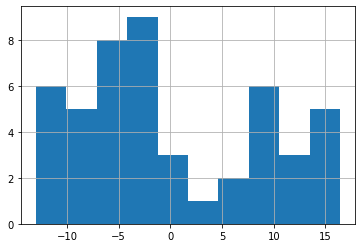

In [ ]:
data.Error.hist()
plt.show()

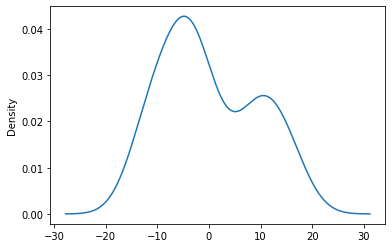

In [ ]:
data.Error.plot(kind='kde')
plt.show()

# **график квантиля квантиля**

**здесь прямая соответствует норманому распределению и чем ближе значения ряда расположены к этой прямой тем они нормальней**

In [ ]:
# !!!!!!!! qqplot(price_1,price_2) - этот пример показывает, что можно на одном графике вывести два ряда данных
# например данные за 2007 и 2011 годы и посмотреть соотвествуют ли эти данные в целом нормальному распределению

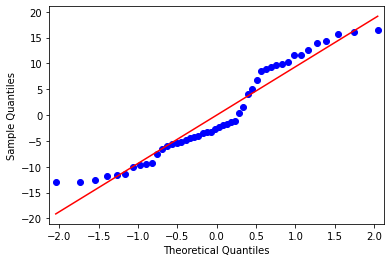

In [ ]:
qqplot(data.Error, line='r') #
plt.show()

**25.	Оцените адекватность модели линейного тренда на основе теста Дарбина-Уотсона, воспользовавшись функцией durbin_watson() из модуля statsmodels.stats.stattools применительно к остаткам модели. Прокомментируйте результат.**


**теста Дарбина-Уотсона** - определяет наличие автокорреляции в остатках

In [ ]:
d=durbin_watson(data.Error)
d

0.18653264301324002

**модель неадекватна, положительная автокорреляция**

вывод: **ИДЕАЛЬНО**, т.е. нет автокорреляции, т.к. близко к 2, если бы было 0, то положительная автокорреляция, если 4 - то отрицательная

**26.	Постройте для ошибок линейного тренда коррелограмму, воспользовавшись функцией autocorrelation_plot() из модуля pandas.plotting. Прокомментируйте результат.**

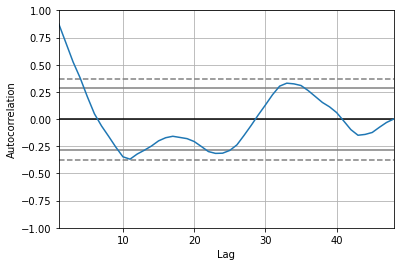

In [ ]:
autocorrelation_plot(data.Error) # а здесь модель неадекватная
plt.show()

**27.	Рассчитайте среднее квадратичное отклонение, воспользовавшись функцией sem() из модуля scipy.stats. Запишите результат в переменную sigma и выведите его на экран.**

In [ ]:
sigma =scipy.stats.sem(y)
sigma

1.8095878000202659

**28.	Рассчитайте двусторонний t критерий Стьюдента для существующего объема выборки и 95% достоверности результата (confidence). Воспользуйтесь функцией t.ppf((1 + confidence) / 2., len(y)-1) из модуля scipy.stats. Запишите результат в переменную tstu и выведите его на экран.**

**t-критерий стюдента**

In [ ]:
confidence=0.95
tstu =scipy.stats.t.ppf((1+confidence)/2.,len(y)-1)
tstu

2.0117405104757546

# **Выполняем прогноз для последующих 12 месяцев**

**29.	Сгенерируйте номера наблюдений для прогнозного интервала, равного 12 месяцев. Запишите результат в переменную t_new и выведите его на экран.**

In [ ]:
t_new =np.arange(len(y)+1, len(y)+13)
t_new

array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [ ]:
t_new =t_new.reshape(-1,1)

**30.	Найдите прогнозные значения цены на материал 1 на год вперед (точечный прогноз). Запишите результат в переменную y_new и выведите его на экран.**

In [ ]:
y_new =model.predict(t_new) # model - эту модель мы
y_new

array([68.84606423, 69.46576294, 70.08546165, 70.70516036, 71.32485907,
       71.94455778, 72.56425649, 73.1839552 , 73.80365392, 74.42335263,
       75.04305134, 75.66275005])

**31.	Рассчитайте верхнюю границу прогнозного интервала**, воспользовавшись формулой: y_up=y_new+tstu* igma.Выведите результат на экран.

In [ ]:
y_up=y_new+tstu*sigma # выисляем верхнюю границу = значение + t критерий * на СКО(среднеквадрати́чное отклоне́ние )
y_up

array([72.48648531, 73.10618402, 73.72588273, 74.34558145, 74.96528016,
       75.58497887, 76.20467758, 76.82437629, 77.444075  , 78.06377371,
       78.68347242, 79.30317113])

**32.	Рассчитайте нижнюю границу прогнозного интервала**, воспользовавшись формулой: y_down=y_new-tstu*sigma. Выведите результат на экран.

In [ ]:
y_down=y_new-tstu*sigma # выисляем верхнюю границу = значение - t критерий * на СКО(среднеквадрати́чное отклоне́ние )
y_down

array([65.20564314, 65.82534185, 66.44504057, 67.06473928, 67.68443799,
       68.3041367 , 68.92383541, 69.54353412, 70.16323283, 70.78293154,
       71.40263025, 72.02232896])

**33.	Нанесите на одну диаграмму фактические значения, значения по модели, точечный и интервальный прогнозы, воспользовавшись функциями figure(), scatter(), plot(), xlabel(), ylabel(), legend() и show() из модуля matplotlib.pyplot.**

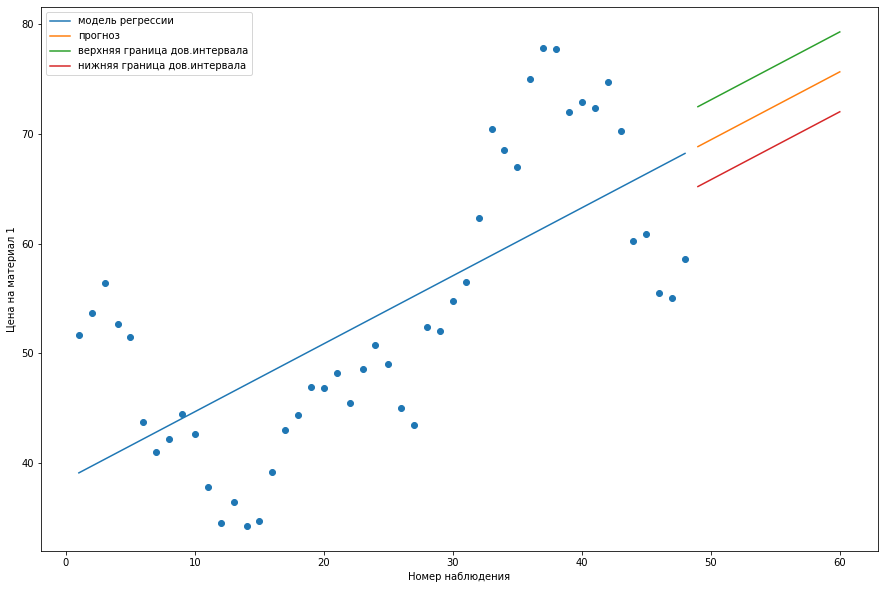

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(t,y)

plt.plot(t, y_pred)
plt.plot(t_new, y_new)
plt.plot(t_new, y_up)
plt.plot(t_new, y_down)

plt.xlabel('Номер наблюдения')
plt.ylabel('Цена на материал 1')
plt.legend(['модель регрессии', 'прогноз', 'верхняя граница дов.интервала', 'нижняя граница дов.интервала'])

plt.show()

**зеленое и красное - это границы прогнозного интервала, с вероятностью 95 % прогнозируемое значение попадет сюда**